# Imports

In [ ]:
!pip install --upgrade pyalgotrading

In [1]:
from pyalgotrading.algobulls import AlgoBullsConnection
import os
from datetime import datetime, date

# Connection

In [2]:
connection = AlgoBullsConnection()

In [3]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


## Validation of API Token

In [4]:
API_TOKEN = "2eb158fd63ce3725fc57a67b06e6e6c5338e96ce"
connection.set_access_token(API_TOKEN)

Access token is valid.


# Strategy Creation

In [5]:
from aroon_crossover import AroonCrossover as strategy_cls

In [6]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'message': 'Strategy saved successfully',
 'cstcId': 134221,
 'strategyId': '371a798d46b64aafa2e9ebbc5c01e9ff'}

In [7]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [8]:
instrument = connection.search_instrument('AAPL', exchange='NASDAQ')[0]['value']
instrument

'NASDAQ:AAPL'

## Setup Parameters

In [9]:
parameters = {
  'TIME_PERIOD': 12
}

In [10]:
initial_virtual_funds = 1e9     # in dollars

## Backtesting

### Start

In [11]:
connection.backtest(
    strategy=strategy, 
    start='2023-05-01 09:15 +0500', 
    end='2023-08-31 15:30 +0500', 
    instrument='NSE:SBIN', 
    lots=5,
    parameters=parameters, 
    candle='1 hour',
    initial_funds_virtual=initial_virtual_funds,
    delete_previous_trades = True
)


Starting the strategy 'Aroon Crossover' in BACKTESTING mode...
╒═════════════════════════╤═══════════════════════════╕
│ Config                  │ Value                     │
╞═════════════════════════╪═══════════════════════════╡
│ Strategy Name           │ Aroon Crossover           │
├─────────────────────────┼───────────────────────────┤
│ Trading Type            │ BACKTESTING               │
├─────────────────────────┼───────────────────────────┤
│ Instrument(s)           │ ['NSE:SBIN']              │
├─────────────────────────┼───────────────────────────┤
│ Quantity/Lots           │ 5                         │
├─────────────────────────┼───────────────────────────┤
│ Start Timestamp         │ 2023-05-01 09:15:00+05:00 │
├─────────────────────────┼───────────────────────────┤
│ End Timestamp           │ 2023-08-31 15:30:00+05:00 │
├─────────────────────────┼───────────────────────────┤
│ Parameters              │ {'TIME_PERIOD': 12}       │
├─────────────────────────┼─────────────

### Status

In [12]:
connection.get_backtesting_job_status(strategy)

{'message': 'STARTING', 'status': 1}

### Logs

#### Fetching Live Logs

In [13]:
logs = connection.get_backtesting_logs(strategy, print_live_logs=True)

Looking for a dedicated virtual server to execute your strategy... (6)

Execution Progress:   0%|          | 0/10563300.0 [00:00<?]

[2023-10-26 09:13:10+00:00] Logs not available yet. Please retry in sometime.
[2023-10-26 09:13:11+00:00] Logs not available yet. Please retry in sometime.
[2023-10-26 09:13:13+00:00] Logs not available yet. Please retry in sometime.
[2023-10-26 14:43:07] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2023-10-26 14:43:07] Sanity checks on cfg successful.
[2023-10-26 14:43:07] Currency set to "INR"
[2023-10-26 14:43:07] Setting up broker connection...
[2023-10-26 14:43:08] Broker connection has been setup successfully.
[2023-10-26 14:43:08] (NSE_EQ) Funds available in client's ABVIRTUALBROKER account is : INR '1000000000.00'
[2023-10-26 14:43:08] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2023-10-26 14:43:08] Welcome ALGOBULLS VIRTUAL USER!
[2023-10-26 14:43:08] Reading strategy...
[2023-10-26 14:43:08] Entering Backtesting mode. Henceforth, all timestamps wil

#### Fetching Logs After Completion

In [14]:
logs = connection.get_backtesting_logs(strategy, print_live_logs=False)
print(logs)

[2023-10-26 14:43:07] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2023-10-26 14:43:07] Sanity checks on cfg successful.
[2023-10-26 14:43:07] Currency set to "INR"
[2023-10-26 14:43:07] Setting up broker connection...
[2023-10-26 14:43:08] Broker connection has been setup successfully.
[2023-10-26 14:43:08] (NSE_EQ) Funds available in client's ABVIRTUALBROKER account is : INR '1000000000.00'
[2023-10-26 14:43:08] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2023-10-26 14:43:08] Welcome ALGOBULLS VIRTUAL USER!
[2023-10-26 14:43:08] Reading strategy...
[2023-10-26 14:43:08] Entering Backtesting mode. Henceforth, all timestamps will be Backtesting timestamps...
[BT] [2023-05-01 09:45:00,000] [INFO] [tls] STARTING ALGOBULLS CORE...
[BT] [2023-05-01 09:45:00,000] [INFO] [tls] 
  #####  #######    #    ######  ####### ### #     #  #####     
 #     #    #      # #

### Stop

In [15]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Success.


## Profit and Loss Reports

#### PnL Table

In [16]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy, force_fetch='True', country="India")
pnl_reports

,instrument_segment,instrument_tradingsymbol,entry_timestamp,entry_transaction_type,entry_quantity,entry_currency,entry_price,entry_variety,exit_timestamp,exit_transaction_type,exit_quantity,exit_currency,exit_price,exit_variety,pnl_absolute,pnl_cumulative_absolute,brokerage,net_pnl
0,NSE,SBIN,2023-05-03 14:15:00+05:30,SELL,5,₹,571.60,MARKET,2023-05-03 15:30:00+05:30,BUY,5,₹,571.00,MARKET,3.00,3.00,0,3.00
1,NSE,SBIN,2023-05-04 11:15:00+05:30,BUY,5,₹,578.85,MARKET,2023-05-04 15:30:00+05:30,SELL,5,₹,580.05,MARKET,6.00,9.00,0,6.00
2,NSE,SBIN,2023-05-08 10:15:00+05:30,SELL,5,₹,578.60,MARKET,2023-05-08 15:30:00+05:30,BUY,5,₹,584.15,MARKET,-27.75,-18.75,0,-27.75
3,NSE,SBIN,2023-05-09 10:15:00+05:30,BUY,5,₹,579.00,MARKET,2023-05-09 14:15:00+05:30,SELL,5,₹,575.05,MARKET,-19.75,-38.50,0,-19.75
4,NSE,SBIN,2023-05-09 14:15:00+05:30,SELL,5,₹,575.05,MARKET,2023-05-09 15:30:00+05:30,BUY,5,₹,573.95,MARKET,5.50,-33.00,0,5.50
5,NSE,SBIN,2023-05-11 11:15:00+05:30,BUY,5,₹,575.00,MARKET,2023-05-11 15:30:00+05:30,SELL,5,₹,573.45,MARKET,-7.75,-40.75,0,-7.75
6,NSE,SBIN,2023-05-12 14:15:00+05:30,SELL,5,₹,579.65,MARKET,2023-05-12 15:15:00+05:30,BUY,5,₹,577.95,MARKET,8.50,-32.25,0,8.50
7,NSE,SBIN,2023-05-12 15:15:00+05:30,BUY,5,₹,577.95,MARKET,2023-05-12 15:30:00+05:30,SELL,5,₹,577.95,MARKET,0.00,-32.25,0,0.00
8,NSE,SBIN,2023-05-17 12:15:00+05:30,SELL,5,₹,581.65,MARKET,2023-05-17 15:30:00+05:30,BUY,5,₹,585.80,MARKET,-20.75,-53.00,0,-20.75
9,NSE,SBIN,2023-05-23 09:15:00+05:30,BUY,5,₹,578.90,MARKET,2023-05-23 15:30:00+05:30,SELL,5,₹,581.55,MARKET,13.25,-39.75,0,13.25


#### Converting PnL Table to CSV

In [17]:
pnl_reports.to_csv("testing_file.csv")

#### Generating Statistics for External CSV

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2023-05-03
End Period                 2023-08-30
Risk-Free Rate             0.0%
Time in Market             87.0%

Cumulative Return          0.0%
CAGR﹪                     0.0%

Sharpe                     3.18
Prob. Sharpe Ratio         92.66%
Smart Sharpe               2.85
Sortino                    5.69
Smart Sortino              5.1
Sortino/√2                 4.03
Smart Sortino/√2           3.61
Omega                      1.8

Max Drawdown               -0.0%
Longest DD Days            31
Volatility (ann.)          0.0%
Calmar                     8.74
Skew                       0.0
Kurtosis                   0.0

Expected Daily %           0.0%
Expected Monthly %         0.0%
Expected Yearly %          0.0%
Kelly Criterion            26.06%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.0%
Expected Shortfall (cVaR)  -0.0%

Max Consecutive Wins       4
Max Consecutive

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2023-07-06,2023-07-13,2023-07-31,24,-7.149999e-06,-6.674999e-06
2,2023-05-08,2023-05-17,2023-06-09,31,-6.200000e-06,-6.125000e-06
3,2023-08-09,2023-08-10,2023-08-17,8,-2.600000e-06,-1.375000e-06
4,2023-06-13,2023-06-15,2023-06-15,2,-1.200000e-06,-5.250000e-07
5,2023-08-25,2023-08-25,2023-08-29,3,-5.999999e-07,0.000000e+00


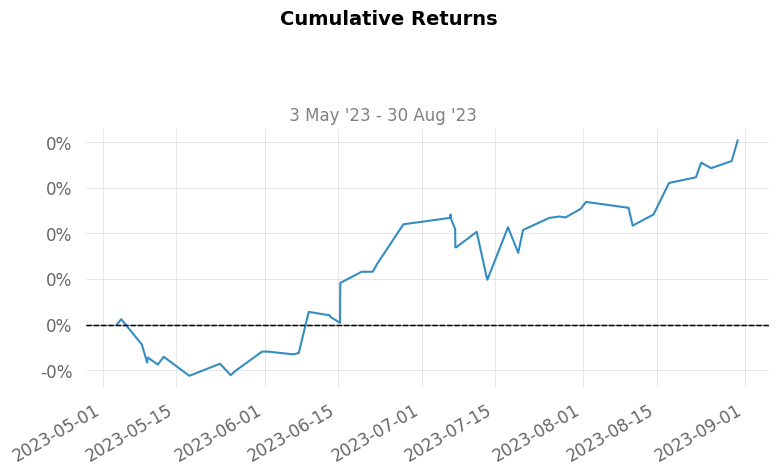

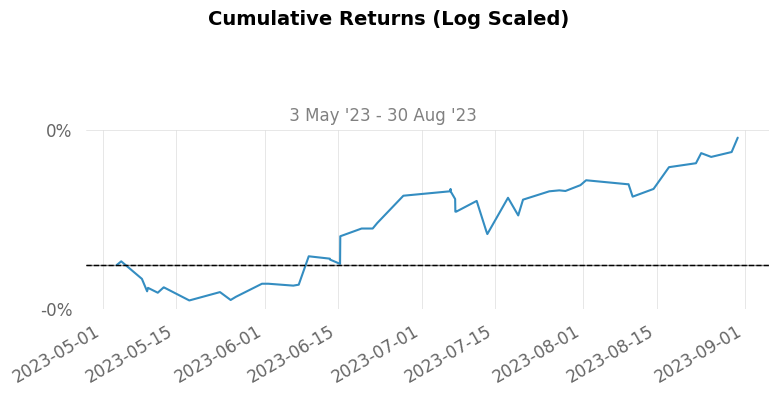

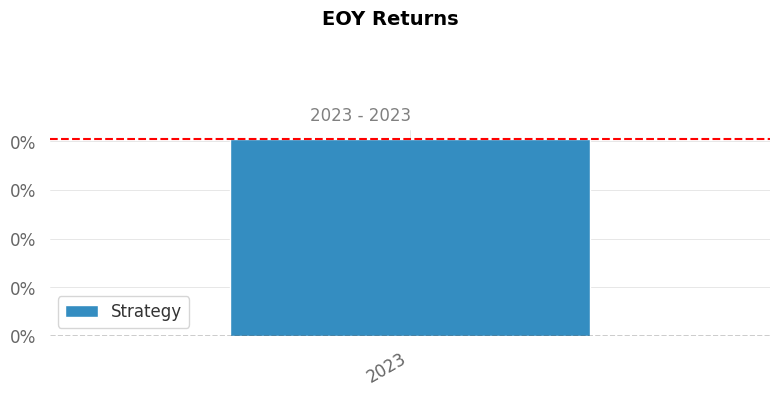

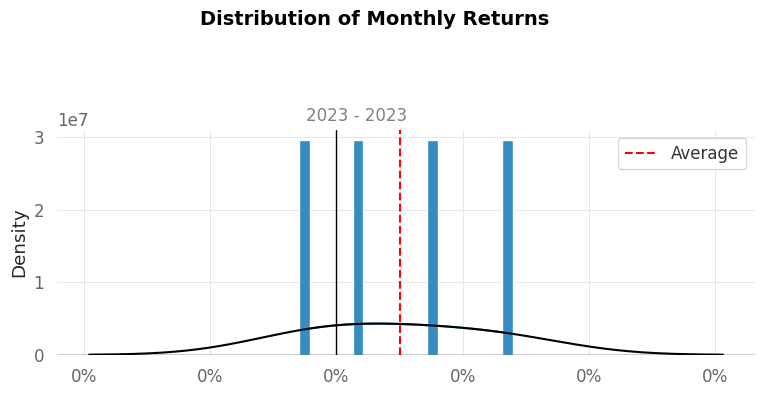

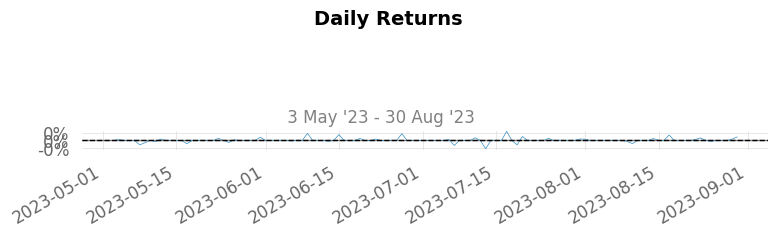

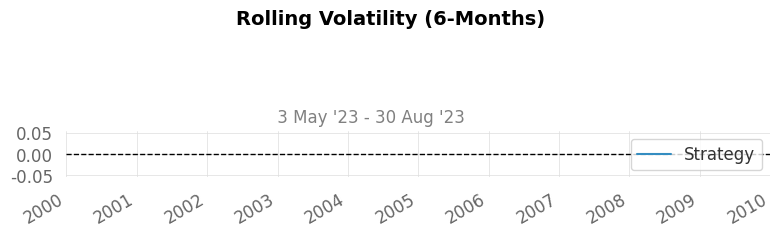

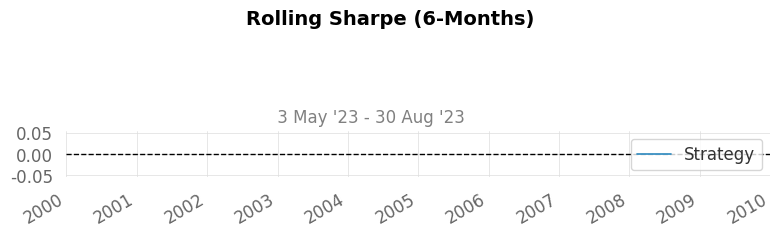

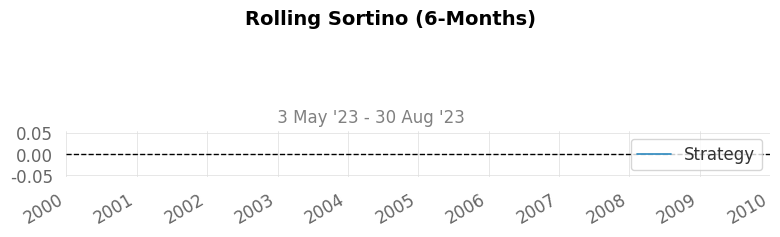

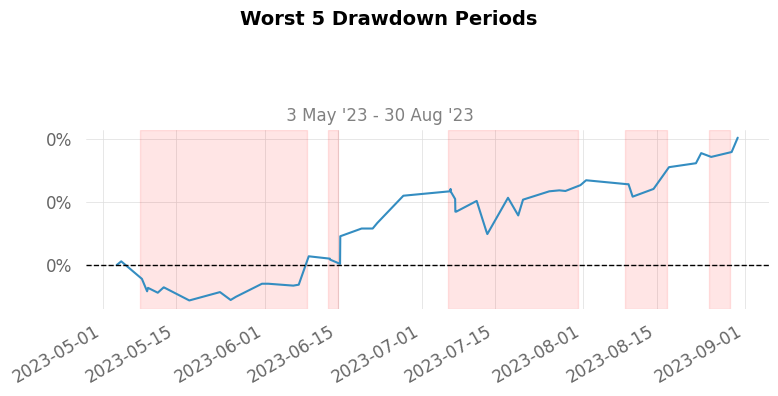

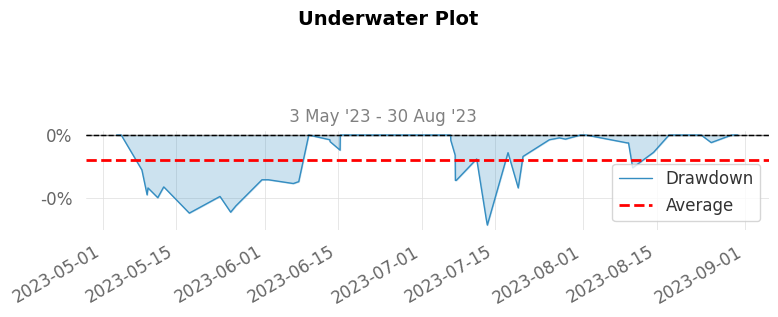

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


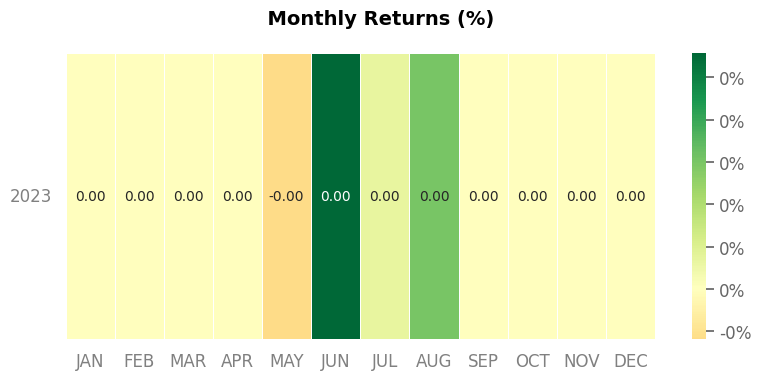

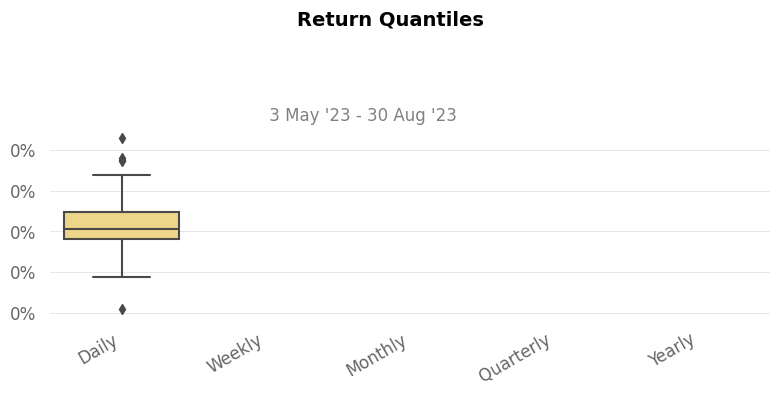

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [18]:
connection.get_report_statistics(file_path="testing_file.csv")

#### PnL Reports with Brokerage Commission Price

In [19]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy, force_fetch='True', broker_commission_price=1, country="India")
pnl_reports

,instrument_segment,instrument_tradingsymbol,entry_timestamp,entry_transaction_type,entry_quantity,entry_currency,entry_price,entry_variety,exit_timestamp,exit_transaction_type,exit_quantity,exit_currency,exit_price,exit_variety,pnl_absolute,pnl_cumulative_absolute,brokerage,net_pnl
0,NSE,SBIN,2023-05-03 14:15:00+05:30,SELL,5,₹,571.60,MARKET,2023-05-03 15:30:00+05:30,BUY,5,₹,571.00,MARKET,3.00,3.00,1,2.00
1,NSE,SBIN,2023-05-04 11:15:00+05:30,BUY,5,₹,578.85,MARKET,2023-05-04 15:30:00+05:30,SELL,5,₹,580.05,MARKET,6.00,9.00,1,5.00
2,NSE,SBIN,2023-05-08 10:15:00+05:30,SELL,5,₹,578.60,MARKET,2023-05-08 15:30:00+05:30,BUY,5,₹,584.15,MARKET,-27.75,-18.75,1,-28.75
3,NSE,SBIN,2023-05-09 10:15:00+05:30,BUY,5,₹,579.00,MARKET,2023-05-09 14:15:00+05:30,SELL,5,₹,575.05,MARKET,-19.75,-38.50,1,-20.75
4,NSE,SBIN,2023-05-09 14:15:00+05:30,SELL,5,₹,575.05,MARKET,2023-05-09 15:30:00+05:30,BUY,5,₹,573.95,MARKET,5.50,-33.00,1,4.50
5,NSE,SBIN,2023-05-11 11:15:00+05:30,BUY,5,₹,575.00,MARKET,2023-05-11 15:30:00+05:30,SELL,5,₹,573.45,MARKET,-7.75,-40.75,1,-8.75
6,NSE,SBIN,2023-05-12 14:15:00+05:30,SELL,5,₹,579.65,MARKET,2023-05-12 15:15:00+05:30,BUY,5,₹,577.95,MARKET,8.50,-32.25,1,7.50
7,NSE,SBIN,2023-05-12 15:15:00+05:30,BUY,5,₹,577.95,MARKET,2023-05-12 15:30:00+05:30,SELL,5,₹,577.95,MARKET,0.00,-32.25,1,-1.00
8,NSE,SBIN,2023-05-17 12:15:00+05:30,SELL,5,₹,581.65,MARKET,2023-05-17 15:30:00+05:30,BUY,5,₹,585.80,MARKET,-20.75,-53.00,1,-21.75
9,NSE,SBIN,2023-05-23 09:15:00+05:30,BUY,5,₹,578.90,MARKET,2023-05-23 15:30:00+05:30,SELL,5,₹,581.55,MARKET,13.25,-39.75,1,12.25


#### PnL Reports with Brokerage Commission Percentage

In [20]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy, force_fetch='True', broker_commission_percentage=1, country="India")
pnl_reports

,instrument_segment,instrument_tradingsymbol,entry_timestamp,entry_transaction_type,entry_quantity,entry_currency,entry_price,entry_variety,exit_timestamp,exit_transaction_type,exit_quantity,exit_currency,exit_price,exit_variety,pnl_absolute,pnl_cumulative_absolute,brokerage,net_pnl
0,NSE,SBIN,2023-05-03 14:15:00+05:30,SELL,5,₹,571.60,MARKET,2023-05-03 15:30:00+05:30,BUY,5,₹,571.00,MARKET,3.00,3.00,57.1300,-54.1300
1,NSE,SBIN,2023-05-04 11:15:00+05:30,BUY,5,₹,578.85,MARKET,2023-05-04 15:30:00+05:30,SELL,5,₹,580.05,MARKET,6.00,9.00,57.9450,-51.9450
2,NSE,SBIN,2023-05-08 10:15:00+05:30,SELL,5,₹,578.60,MARKET,2023-05-08 15:30:00+05:30,BUY,5,₹,584.15,MARKET,-27.75,-18.75,58.1375,-85.8875
3,NSE,SBIN,2023-05-09 10:15:00+05:30,BUY,5,₹,579.00,MARKET,2023-05-09 14:15:00+05:30,SELL,5,₹,575.05,MARKET,-19.75,-38.50,57.7025,-77.4525
4,NSE,SBIN,2023-05-09 14:15:00+05:30,SELL,5,₹,575.05,MARKET,2023-05-09 15:30:00+05:30,BUY,5,₹,573.95,MARKET,5.50,-33.00,57.4500,-51.9500
5,NSE,SBIN,2023-05-11 11:15:00+05:30,BUY,5,₹,575.00,MARKET,2023-05-11 15:30:00+05:30,SELL,5,₹,573.45,MARKET,-7.75,-40.75,57.4225,-65.1725
6,NSE,SBIN,2023-05-12 14:15:00+05:30,SELL,5,₹,579.65,MARKET,2023-05-12 15:15:00+05:30,BUY,5,₹,577.95,MARKET,8.50,-32.25,57.8800,-49.3800
7,NSE,SBIN,2023-05-12 15:15:00+05:30,BUY,5,₹,577.95,MARKET,2023-05-12 15:30:00+05:30,SELL,5,₹,577.95,MARKET,0.00,-32.25,57.7950,-57.7950
8,NSE,SBIN,2023-05-17 12:15:00+05:30,SELL,5,₹,581.65,MARKET,2023-05-17 15:30:00+05:30,BUY,5,₹,585.80,MARKET,-20.75,-53.00,58.3725,-79.1225
9,NSE,SBIN,2023-05-23 09:15:00+05:30,BUY,5,₹,578.90,MARKET,2023-05-23 15:30:00+05:30,SELL,5,₹,581.55,MARKET,13.25,-39.75,58.0225,-44.7725


#### PnL Reports with Slippage Percentage

In [21]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy, force_fetch='True', slippage_percent=3, country="India")
pnl_reports

,instrument_segment,instrument_tradingsymbol,entry_timestamp,entry_transaction_type,entry_quantity,entry_currency,entry_price,entry_variety,exit_timestamp,exit_transaction_type,exit_quantity,exit_currency,exit_price,exit_variety,pnl_absolute,pnl_cumulative_absolute,brokerage,net_pnl
0,NSE,SBIN,2023-05-03 14:15:00+05:30,SELL,5,₹,554.4520,MARKET,2023-05-03 15:30:00+05:30,BUY,5,₹,588.1300,MARKET,33.6780,3.00,0,33.6780
1,NSE,SBIN,2023-05-04 11:15:00+05:30,BUY,5,₹,561.4845,MARKET,2023-05-04 15:30:00+05:30,SELL,5,₹,597.4515,MARKET,35.9670,9.00,0,35.9670
2,NSE,SBIN,2023-05-08 10:15:00+05:30,SELL,5,₹,595.9580,MARKET,2023-05-08 15:30:00+05:30,BUY,5,₹,566.6255,MARKET,-29.3325,-18.75,0,-29.3325
3,NSE,SBIN,2023-05-09 10:15:00+05:30,BUY,5,₹,579.0000,MARKET,2023-05-09 14:15:00+05:30,SELL,5,₹,557.7985,MARKET,-21.2015,-38.50,0,-21.2015
4,NSE,SBIN,2023-05-09 14:15:00+05:30,SELL,5,₹,557.7985,MARKET,2023-05-09 15:30:00+05:30,BUY,5,₹,556.7315,MARKET,-1.0670,-33.00,0,-1.0670
5,NSE,SBIN,2023-05-11 11:15:00+05:30,BUY,5,₹,592.2500,MARKET,2023-05-11 15:30:00+05:30,SELL,5,₹,590.6535,MARKET,-1.5965,-40.75,0,-1.5965
6,NSE,SBIN,2023-05-12 14:15:00+05:30,SELL,5,₹,597.0395,MARKET,2023-05-12 15:15:00+05:30,BUY,5,₹,595.2885,MARKET,-1.7510,-32.25,0,-1.7510
7,NSE,SBIN,2023-05-12 15:15:00+05:30,BUY,5,₹,577.9500,MARKET,2023-05-12 15:30:00+05:30,SELL,5,₹,595.2885,MARKET,17.3385,-32.25,0,17.3385
8,NSE,SBIN,2023-05-17 12:15:00+05:30,SELL,5,₹,564.2005,MARKET,2023-05-17 15:30:00+05:30,BUY,5,₹,585.8000,MARKET,21.5995,-53.00,0,21.5995
9,NSE,SBIN,2023-05-23 09:15:00+05:30,BUY,5,₹,578.9000,MARKET,2023-05-23 15:30:00+05:30,SELL,5,₹,564.1035,MARKET,-14.7965,-39.75,0,-14.7965


### Statistics

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2023-05-03
End Period                 2023-08-30
Risk-Free Rate             0.0%
Time in Market             93.0%

Cumulative Return          0.0%
CAGR﹪                     0.0%

Sharpe                     0.74
Prob. Sharpe Ratio         63.25%
Smart Sharpe               0.67
Sortino                    1.11
Smart Sortino              1.0
Sortino/√2                 0.78
Smart Sortino/√2           0.71
Omega                      1.13

Max Drawdown               -0.0%
Longest DD Days            38
Volatility (ann.)          0.0%
Calmar                     2.1
Skew                       0.0
Kurtosis                   0.0

Expected Daily %           0.0%
Expected Monthly %         0.0%
Expected Yearly %          0.0%
Kelly Criterion            5.24%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.0%
Expected Shortfall (cVaR)  -0.0%

Max Consecutive Wins       3
Max Consecutive 

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2023-05-08,2023-06-07,2023-06-15,38,-0.000008,-0.000006
2,2023-06-21,2023-07-06,2023-07-17,25,-0.000006,-0.000006
3,2023-07-25,2023-07-27,2023-08-23,29,-0.000006,-0.000004
4,2023-08-29,2023-08-30,2023-08-30,1,-0.000005,-0.000003
5,2023-07-19,2023-07-19,2023-07-20,0,-0.000001,0.000000


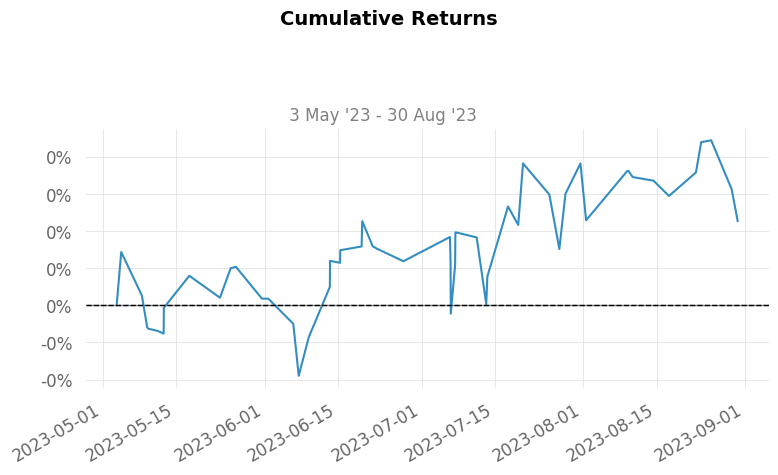

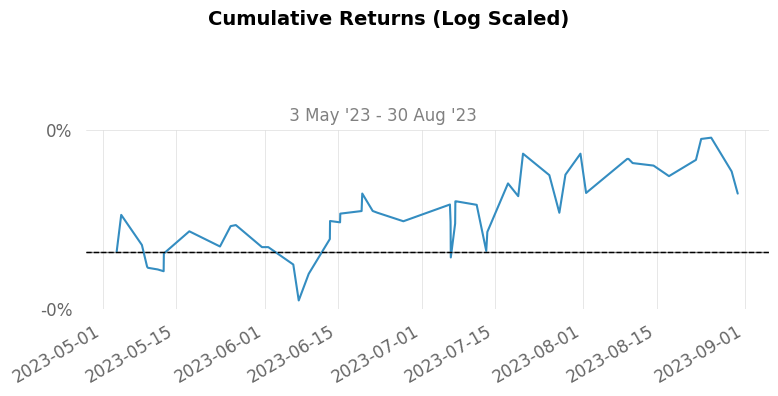

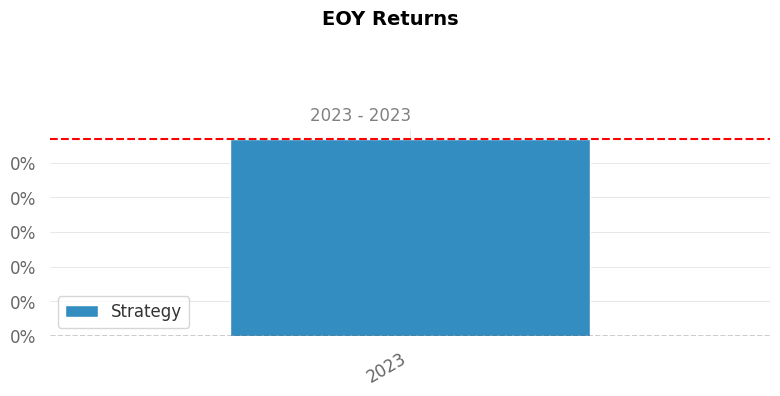

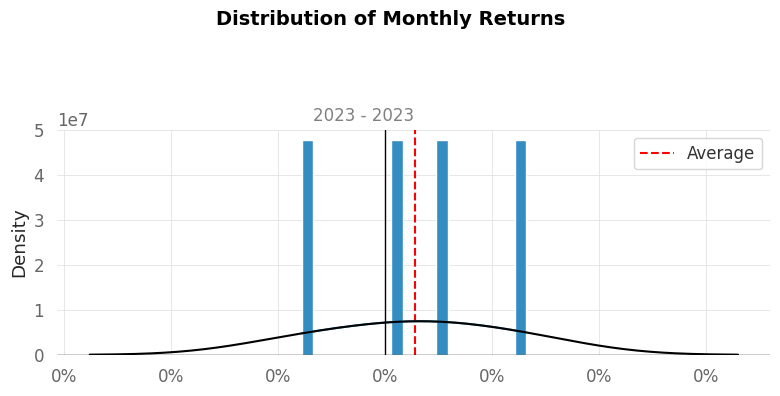

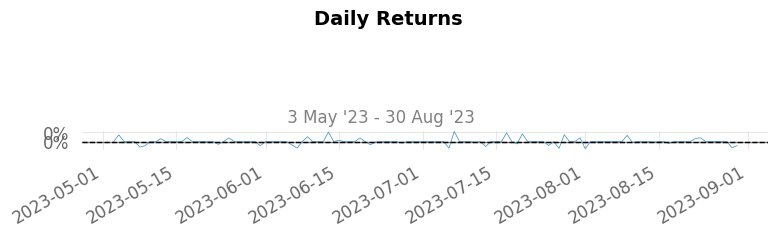

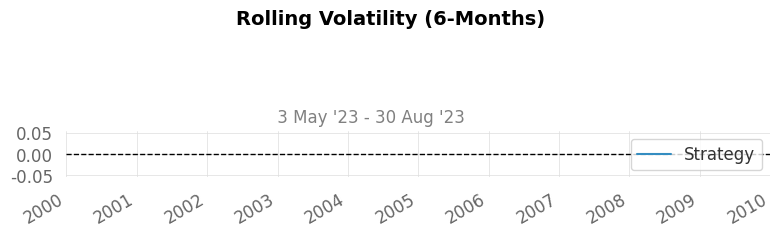

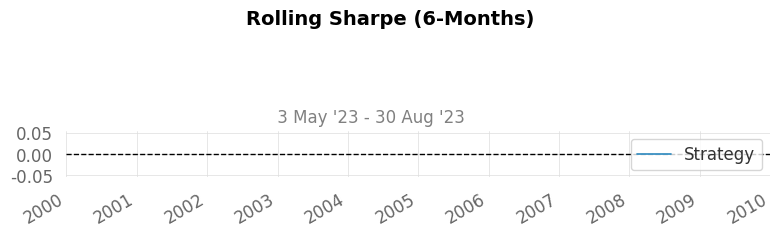

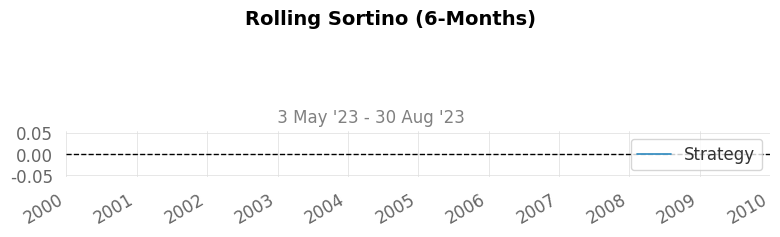

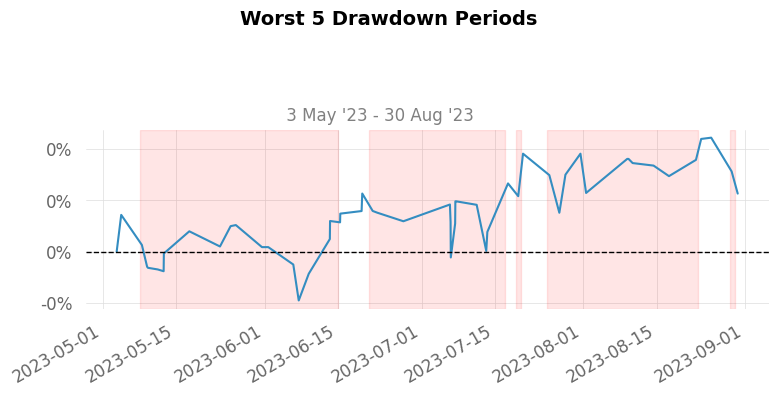

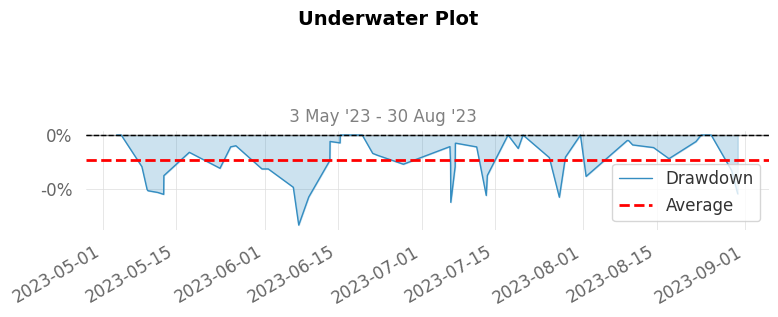

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


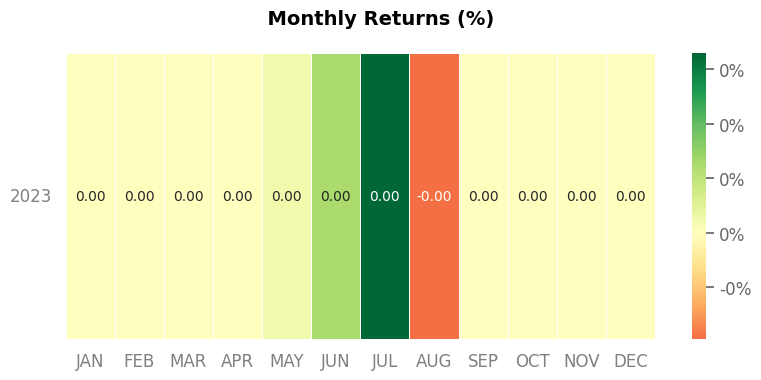

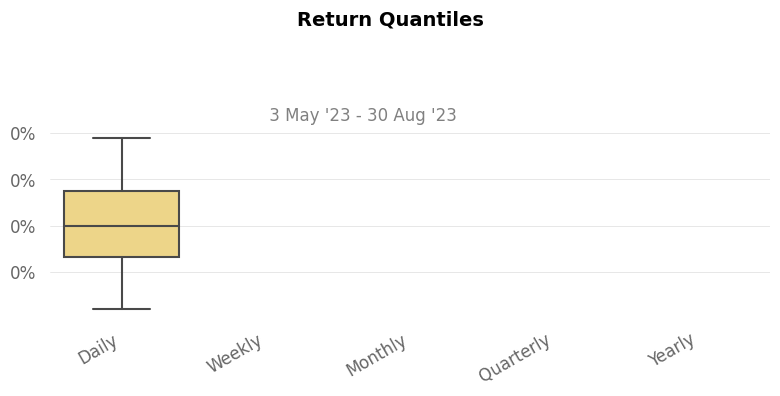

In [22]:
connection.get_backtesting_report_statistics(strategy, report="full")

### Order History

In [23]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)

+------------------+----------------------------------+
| Order ID         | 5939dde3b6fe428a8ae879e0761fb10a |
| Transaction Type | BUY                              |
| Instrument       | NSE:SBIN                         |
| Quantity         | 5                                |
| Price            | ₹568.05                          |
+------------------+----------------------------------+
+-----------------------------+------------------------+
| timestamp_created           | state                  |
|-----------------------------+------------------------|
| 2023-10-26T09:13:52.315565Z | COMPLETE               |
| 2023-10-26T09:13:52.315547Z | OPEN                   |
| 2023-10-26T09:13:52.315529Z | OPEN PENDING           |
| 2023-10-26T09:13:52.315507Z | VALIDATION PENDING     |
| 2023-10-26T09:13:52.315449Z | PUT ORDER REQ RECEIVED |
+-----------------------------+------------------------+

+------------------+----------------------------------+
| Order ID         | a56e0ac774ec41d49

#### Order History as a dataframe

In [24]:
order_history = connection.get_backtesting_report_order_history(strategy, render_as_dataframe=True)
order_history

,timestamp_created,transaction_type,state,instrument,quantity,currency,price
orderId,,,,,,,
82fc8efd882e449e952efba2421cef99,2023-10-26T09:13:09.649614Z,SELL,PUT ORDER REQ RECEIVED,NSE:SBIN,5,₹,571.60
82fc8efd882e449e952efba2421cef99,2023-10-26T09:13:09.649682Z,SELL,VALIDATION PENDING,NSE:SBIN,5,₹,571.60
82fc8efd882e449e952efba2421cef99,2023-10-26T09:13:09.649705Z,SELL,OPEN PENDING,NSE:SBIN,5,₹,571.60
82fc8efd882e449e952efba2421cef99,2023-10-26T09:13:09.649724Z,SELL,OPEN,NSE:SBIN,5,₹,571.60
82fc8efd882e449e952efba2421cef99,2023-10-26T09:13:09.649741Z,SELL,COMPLETE,NSE:SBIN,5,₹,571.60
b8509c6a4c77416eb8c5e02e67a8e6b5,2023-10-26T09:13:10.565854Z,BUY,PUT ORDER REQ RECEIVED,NSE:SBIN,5,₹,571.00
b8509c6a4c77416eb8c5e02e67a8e6b5,2023-10-26T09:13:10.565919Z,BUY,VALIDATION PENDING,NSE:SBIN,5,₹,571.00
b8509c6a4c77416eb8c5e02e67a8e6b5,2023-10-26T09:13:10.565941Z,BUY,OPEN PENDING,NSE:SBIN,5,₹,571.00
b8509c6a4c77416eb8c5e02e67a8e6b5,2023-10-26T09:13:10.565959Z,BUY,OPEN,NSE:SBIN,5,₹,571.00


In [26]:
order_history.loc["82fc8efd882e449e952efba2421cef99"]

,timestamp_created,transaction_type,state,instrument,quantity,currency,price
orderId,,,,,,,
82fc8efd882e449e952efba2421cef99,2023-10-26T09:13:09.649614Z,SELL,PUT ORDER REQ RECEIVED,NSE:SBIN,5,₹,571.6
82fc8efd882e449e952efba2421cef99,2023-10-26T09:13:09.649682Z,SELL,VALIDATION PENDING,NSE:SBIN,5,₹,571.6
82fc8efd882e449e952efba2421cef99,2023-10-26T09:13:09.649705Z,SELL,OPEN PENDING,NSE:SBIN,5,₹,571.6
82fc8efd882e449e952efba2421cef99,2023-10-26T09:13:09.649724Z,SELL,OPEN,NSE:SBIN,5,₹,571.6
82fc8efd882e449e952efba2421cef99,2023-10-26T09:13:09.649741Z,SELL,COMPLETE,NSE:SBIN,5,₹,571.6
